<a href="https://colab.research.google.com/github/lequangtruongK50/Bai_tap_fuzzy/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import plotly.express as px
import urllib.request

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import files
import zipfile
import os

# Tải file ZIP từ máy lên Colab
uploaded = files.upload()  # Chọn file .zip của bạn

# Giải nén file ZIP
for filename in uploaded.keys():
    zip_path = filename
    extract_folder = filename.replace(".zip", "")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

    print(f"✅ Giải nén hoàn tất vào thư mục: {extract_folder}")

# Kiểm tra thư mục đã giải nén
os.listdir(extract_folder)

Saving loai hoa.zip to loai hoa.zip
✅ Giải nén hoàn tất vào thư mục: loai hoa


['loai hoa']

In [ ]:
import zipfile
import os

zip_path = "/content/loai hoa.zip"  # hoặc sửa tên file zip nếu khác
extract_path = "/content/loaihoa_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Giải nén xong!")


✅ Giải nén xong!


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
data = []
labels = []

classes = ['hoa hướng dương', 'hoa hồng', 'hoa mai', 'hoa phượng', 'hoa đào']
img_size = (100, 100)

for i, label in enumerate(classes):
    folder_path = f"/content/loaihoa_data/loai hoa/hoa train/{label}"
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = load_img(img_path, target_size=img_size)
            img = img_to_array(img) / 255.0  #độ phân giải
            data.append(img)
            labels.append(i)
        except Exception as e:
            print(f"Lỗi ảnh: {img_path} - {e}")

data = np.array(data)
labels = to_categorical(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,848,709 (14.68 MB)

 Trainable params: 3,848,709 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.2062 - loss: 3.3364 - val_accuracy: 0.0909 - val_loss: 21.8544
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2500 - loss: 20.5232 - val_accuracy: 0.1818 - val_loss: 10.2841
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.2333 - loss: 10.3065 - val_accuracy: 0.1818 - val_loss: 11.0060
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1958 - loss: 11.5320 - val_accuracy: 0.2727 - val_loss: 5.6067
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.3750 - loss: 7.1525 - val_accuracy: 0.2727 - val_loss: 7.2803
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3750 - loss: 7.9357 - val_accuracy: 0.3636 - val_loss: 3.4835
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5208 - loss: 3.7028 - val_accuracy: 0.1818 - val_loss: 4.8965
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2562 - loss: 4.9401 - val_accuracy: 0.3636 - val

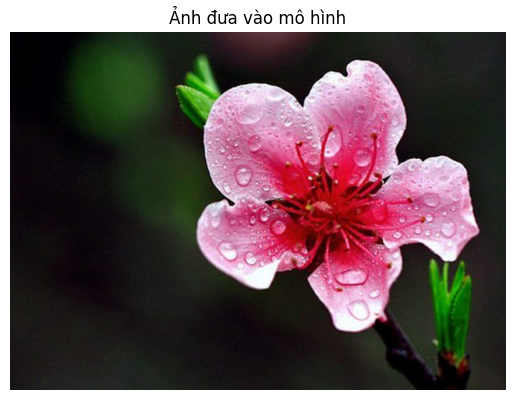

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
✅ Món ăn dự đoán: **hoa đào**
🎯 Xác suất: 86.90%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def predict_image(img_path):
    # Hiển thị ảnh
    img_display = load_img(img_path)
    plt.imshow(img_display)
    plt.axis('off')
    plt.title("Ảnh đưa vào mô hình")
    plt.show()

    # Tiền xử lý ảnh cho mô hình
    img = load_img(img_path, target_size=(100, 100))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Dự đoán
    pred = model.predict(img)
    class_index = np.argmax(pred)
    confidence = np.max(pred)

    # In kết quả
    print(f"✅ Món ăn dự đoán: **{classes[class_index]}**")
    print(f"🎯 Xác suất: {confidence * 100:.2f}%")

# 🧪 Ví dụ dùng ảnh gỏi cuốn
predict_image("/content/loai hoa/loai hoa/hoa test/1.jpg")

In [ ]:
model.save("hoa_vip.h5")
from google.colab import files
files.download("hoa_vip.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>